<a href="https://colab.research.google.com/github/Batman511/Numerical_methods_5sem/blob/main/%D0%A7%D0%B8%D1%81%D0%BB%D0%B0%D0%BA%D0%B8_3%D0%BB%D0%B0%D0%B1%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

# Численное интегрирование

     start_x   start_y
0   0.000000  0.000000
1   0.454545  0.425628
2   0.909091  0.720696
3   1.363636  0.877234
4   1.818182  0.948657
5   2.272727  0.978992
6   2.727273  0.991483
7   3.181818  0.996560
8   3.636364  0.998613
9   4.090909  0.999441
10  4.545455  0.999775
11  5.000000  0.999909
Равномерный шаг =  0.45454545454545453 
Реальная площадь под графиком =  4.3068982183392714


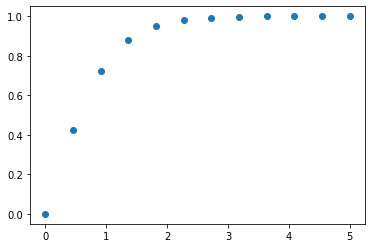

In [3]:
def function(x):
  return np.tanh(x)

N=12
START=0
FINISH=5

start_x = np.linspace(START, FINISH, N)
start_y = function( start_x )
real_I = np.log( (np.e**5+np.e**(-5))/2 )

df = pd.DataFrame({'start_x': start_x, 'start_y': start_y})
print(df)

ax = plt.subplot()
ax.scatter(start_x, start_y, marker='o')

# шаг и площадь
h = (FINISH-START)/ (len(start_y)-1)
print("Равномерный шаг = ",h,"\nРеальная площадь под графиком = ", real_I)

Метод прямоугольников, трапеций и Симпсона

In [4]:
def interpol(x,y,t):
  assert len(x) == len(y), 'x and y must have the same len'
  assert len(x) != 0, 'x and y cannot be empty'
  sum=0

  for i in range(len(y)):
    P1=1; P2=1
    for j in range(len(y)):
      if i!=j:
        P1 = P1*(t-x[j])
        P2 = P2*(x[i]-x[j])

    sum+=y[i]*P1/P2
  return sum  

In [6]:
def I_rectangle(start_y):
  h = FINISH/ (len(start_y)-1)
  n=len(start_y)-1
  I=0

  for i in range(n):
    I += h*start_y[i]
  return I

def I_trapezoid(start_y):
  h = FINISH/ (len(start_y)-1)
  n=len(start_y)-1
  I=0

  for i in range(n):
    I += h*(start_y[i+1]+start_y[i])/2
  return I

def I_Simpson(start_y):
  h = FINISH/ (len(start_y)-1)
  N = len(start_y)
  start_x = np.linspace(START, FINISH, N)
  I=0

  n_promej = N-1
  for i in range(1, n_promej+1):
    I += h*( start_y[i-1] + 4*( function( start_x[i-1] + h/2 ) ) + start_y[i] )/6
  return I

def I_Gauss(start_y):
  h = FINISH/ (len(start_y)-1)
  n=len(start_y)-1
  I=0

  for i in range(n):
    I += h* (function( ((start_x[i+1] + start_x[i]) /2) - h/(2*np.sqrt(3)) ) 
          +  function( ((start_x[i+1] + start_x[i]) /2) + h/(2*np.sqrt(3)) )) /2
  return I

def I_3_8(start_y):
  h = FINISH/ (len(start_y)-1)
  n=len(start_y)-1
  I=0

  for i in range(n):
    I += h* (function(start_x[i]) + 3*function((2*start_x[i] + start_x[i+1]) / 3) + 3*function((start_x[i] + 2*start_x[i+1]) / 3) + function(start_x[i+1])) / 8
  return I


  # if (N%2)==1:
  #   n_promej = int((N-1)/2)
  #   for i in range(1, n_promej+1):
  #     j = 2*(i-1) + 1
  #     I += h*( start_y[j-1] + 4*start_y[j] + start_y[j+1] )/3
  #   return I
  # else:
  #   n_promej = N-1
  #   for i in range(1, n_promej+1):
  #     I += h*( start_y[i-1] + 4*( interpol(start_x, start_y, start_x[i-1] + h/2 ) ) + start_y[i] )/6
  #   return I

Функция ошибки

In [7]:
print('Метод прямоугольников:', I_rectangle(start_y), '\nМетод трапеций:       ', I_trapezoid(start_y), '\nМетод Симпсона:       ', I_Simpson(start_y),
      '\nМетод Гаусса:         ', I_Gauss(start_y),'\nПравило 3/8:          ', I_3_8(start_y), "\n\nreal integral:        ", real_I)


Метод прямоугольников: 4.062307838339187 
Метод трапеций:        4.289559930217049 
Метод Симпсона:        4.306929495000663 
Метод Гаусса:          4.306877293742306 
Правило 3/8:           4.3069120365055005 

real integral:         4.3068982183392714


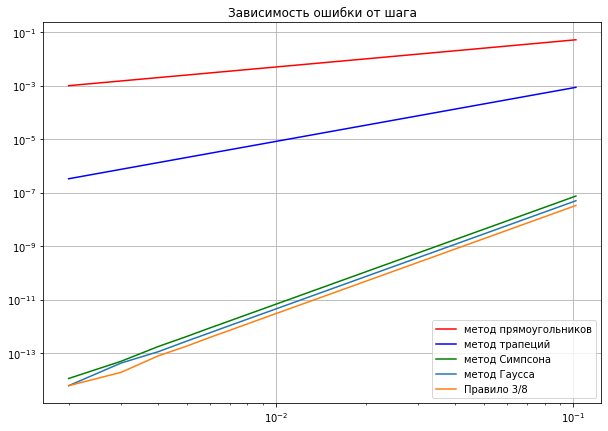

In [9]:
loss_rectangle=[]
loss_trapezoid=[]
loss_Simpson=[]
loss_Gauss=[]
loss_3_8=[]
step =[]

hrange = np.arange(0.002,0.1,0.001)
for i in range(len(hrange)):
  hh = hrange[i]
  n = int((FINISH - START)//hh)
  start_x = np.linspace(START, FINISH, n)
  start_y = function( start_x )

  step.append( (FINISH-START)/ (len(start_y)-1) )
  loss_rectangle.append(np.abs(real_I - I_rectangle(start_y)))
  loss_trapezoid.append(np.abs(real_I - I_trapezoid(start_y)))
  loss_Simpson.append(np.abs(real_I - I_Simpson(start_y)))
  loss_Gauss.append(np.abs(real_I - I_Gauss(start_y)))
  loss_3_8.append(np.abs(real_I - I_3_8(start_y)))


plt.figure(figsize=(10,7))
plt.plot(step, loss_rectangle, 'r', label = 'метод прямоугольников')
plt.plot(step, loss_trapezoid, 'b', label = 'метод трапеций')
plt.plot(step, loss_Simpson, 'g', label = 'метод Симпсона')
plt.plot(step, loss_Gauss, label = 'метод Гаусса')
plt.plot(step, loss_3_8, label = 'Правило 3/8')
plt.title("Зависимость ошибки от шага")
plt.grid(True)
plt.yscale('log')
plt.xscale('log')
plt.legend(loc=4)
